In [3]:
import keras
import os
import pickle
import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from build_database import build_database
from PIL import Image, ImageOps;
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

Using TensorFlow backend.


In [4]:
descriptors = pickle.load(open("descriptor.p", "rb"))

In [5]:
descriptors.shape

(477, 1, 4096)

In [6]:
descriptors2 = pickle.load(open("descriptor2.p", "rb"))

In [7]:
descriptors2.shape

(717, 1, 4096)

In [8]:
descriptors3 = pickle.load(open("descriptor3.p", "rb"))

In [9]:
descriptors3.shape

(1194, 1, 4096)

In [10]:
imagen = pickle.load(open("imagen.p", "rb"))

In [11]:
imagen2 = pickle.load(open("imagen2.p", "rb"))

In [12]:
imagen3 = pickle.load(open("imagen3.p", "rb"))

In [13]:
descriptors_val=np.reshape(descriptors,(477,4096))

In [14]:
descriptors_train=np.reshape(descriptors3,(1194,4096))

In [15]:
#Hago la lectura de todas las líneas del .txt
with open("./TB2017/val/annotation.txt",'r') as f:
        archivo1 = f.readlines()

In [16]:
archivo1.sort()#Ordeno la lista de archivos para tenerlo en el mismo orden que las imagenes.

In [17]:
pictionari = {}
ip=0
for ip in range(len(archivo1)):
    pictionari[archivo1[ip][0:10]] = archivo1[ip][11:len(archivo1[ip])-1] #Aquí genero un diccionario de nombres y etiquetas.

In [18]:
pictionari_val = {}
ipp=0
for ipp in range(len(archivo1)-1):
    pictionari_val[ipp]=pictionari[archivo1[ipp+1][0:10]] #Aquí relaciono las etiquetas con los índices del vector

In [19]:
#Ahora lo mismo para las otra. Ya que no empleamos test.
#Así obtengo un diccionario que me relaciona los elementos de los vectores de las fotos con sus etiquetas

In [20]:
#Hago la lectura de todas las líneas del .txt
with open("./TB2017/train/annotation.txt",'r') as f:
        archivo3 = f.readlines()
        

In [21]:
archivo3.sort()#Ordeno la lista de archivos para tenerlo en el mismo orden que las imagenes.

In [22]:
pictionari3 = {}
ipo=0
for ipo in range(len(archivo3)):
    pictionari3[archivo3[ipo][0:10]] = archivo3[ipo][11:len(archivo3[ipo])-1] #Aquí genero un diccionario de nombres y etiquetas.

In [23]:
pictionari_train = {}
ippo=0
for ippo in range(len(archivo3)-1):
    pictionari_train[ippo]=pictionari3[archivo3[ippo+1][0:10]] #Aquí relaciono las etiquetas con los índices del vector

In [24]:
relevantes = {}
lop=0
for lop in range(len(archivo3)):
    if relevantes.get(archivo3[lop][11:len(archivo3[lop])-1]):
        relevantes[archivo3[lop][11:len(archivo3[lop])-1]]=relevantes[archivo3[lop][11:len(archivo3[lop])-1]]+1
    else: 
        relevantes[archivo3[lop][11:len(archivo3[lop])-1]] =1
del relevantes["ssID"] # Así elimino la primera línea // Solo correr una vez.

In [25]:
relevantes

{'ajuntament': 75,
 'castell_cartoixa': 75,
 'catedral': 75,
 'desconegut': 295,
 'dona_treballadora': 74,
 'escola_enginyeria': 75,
 'estacio_nord': 75,
 'farmacia_albinyana': 75,
 'masia_freixa': 75,
 'mercat_independencia': 75,
 'mnactec': 75,
 'societat_general': 75,
 'teatre_principal': 75}

In [26]:
x_val_normalized = sklearn.preprocessing.normalize(descriptors_val, norm='l2', axis=1, copy=True, return_norm=False)

In [27]:
x_train_normalized = sklearn.preprocessing.normalize(descriptors_train, norm='l2', axis=1, copy=True, return_norm=False)

In [28]:
x_train_normalized= x_train_normalized.transpose()

In [29]:
Last = np.matmul(x_val_normalized,x_train_normalized,out = None)

In [30]:
ranks = np.argsort(Last,axis = 1)[:,::-1]

In [31]:
x_val_images = []
for ol in range(477):   
    
    x_val_images.append(np.array(imagen[ol]))
    

In [32]:
x_train_images = []

for oil in range(1194):   
    
    x_train_images.append(np.array(imagen3[oil]))

In [33]:
from PIL import Image, ImageOps;
# get the original images for visualization
# x_test_normalized = np.empty((717,4096))
h,w = (224, 224)
new_image= Image.new('RGB', (h*5,w*13))

In [34]:
pictionari_val[1]

'dona_treballadora'

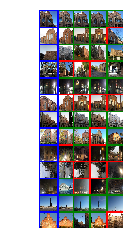

In [35]:
# Visualize ranks of the 10 queries
count=0
k=4
offset = 10 # it will show results from query #'offset' to #offset+10
for q in range(13):
    etiqueta=[]
    ranks_q = []
    ranks_q = ranks[q*(offset+1),:] #Aquí ranks, te coge los que más se parezcan en orden
    for long in range(k):#Aquí miro los K primeras // ranks_q.size
        etiqueta.append(pictionari_train[ranks_q[long]])  
        
    for i in range(k):
        if pictionari_val[q*(offset+1)] == etiqueta[i]:
            #new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))
            new_image.paste( ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]),border=20,fill='green'), (h*(1+i),w*q ))
            count =count+1
        else:
            new_image.paste( ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]),border=20,fill='red'), (h*(1+i),w*q ))

  # visualize query
    ima_q = Image.fromarray(x_val_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=20, fill='blue')
    new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [36]:
new_image.save('prueba.jpg')

In [37]:
#Ahora todos los MAP de todas las fotos con M=3.

In [60]:
pictionari_val[q]

'mercat_independencia'

In [92]:
# Visualize ranks of the 10 queries

k=len(pictionari_train)
offset = 0 # it will show results from query #'offset' to #offset+10
AP_final=[]
for q in range(477):
    if pictionari_val[q] != 'desconegut':
        total = relevantes[pictionari_val[q]]
        final = total
        AP = []
        count = 0
        etiqueta = []
        ranks_q = []
        ranks_q = ranks[q*(offset+1),:] #Aquí ranks, te coge los que más se parezcan en orden

        for long in range(k):#Aquí miro los K primeras // ranks_q.size
            etiqueta.append(pictionari_train[ranks_q[long]])     

        for i in range(k):
            if pictionari_val[q*(offset+1)] == etiqueta[i] and total != 0:
                count = count + 1
                final = final - 1
                AP.append(count/float(i+1))
            if final == 0:
                break

        suma=0
        o=0
        for o in AP:
            suma += o
        AP_final.append(suma/float(total))


In [93]:
max(AP_final)

0.8242398177479504

In [94]:
min(AP_final)

0.039524721937941217

In [102]:
suma=0
o=0
for o in AP_final:
    suma += o
AP_final_tot_M3 =suma/float(len(AP_final))

In [103]:
AP_final_tot_M3

0.3745494858035534

In [104]:
len(AP_final)

359